# CSI 4142 - Introduction to Data Science
# Assignment 1: Exploratory Data Analysis

Shacha Parker (300235525)\
Callum Frodsham and (300199446)\
Group 79

In [7]:
# Initial Imports. May not all be useful, but worth
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import kagglehub


## Analysis Reasoning
We're doing the EDA on the following two datasets to familiarize ourselves with the process. (more text here)

<h1 >Dataset 1: Mobile Device Usage and User Behavior</h1>
Author: Vala Khorasani
<br>
Purpose: The purpose of this dataset is to provide insights pertaining to mobile device user behaviour and the connection to their usage patterns.
<br>
Shape: This Data set is composed of 11 Columns, and 700 rows.
<br><br>
Link: <a href="https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset"> Mobile Device Usage and User Behavior</a>
<br><br>
<h3>Dataset Feature List:</h3>
<ol>
    <li>User ID
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The User ID is a unique ID that is assigned to each mobile device user to track their mobile device usage individually. There are 700 entries, labeled '1' to '700'.
        </li>
    <br>
    <li>Device Model<br>
    Feature Type: Categorical - Nominal<br>
    Description: Model of the User's smartphone.
    </li>
    <br>
    <li>Operating System<br>
    Feature Type: Categorical - Nominal<br>
    Description:Operating system running on the mobile device. Only Android or iOS.
    </li>
    <br>
    <li>App Usage Time<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Total daily time spent using mobile applications, measured in minutes
    </li>
    <br>
    <li>Screen On Time<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Average daily duration the screen is active, measured in hours
    </li>
    <br>
    <li>Battery Drain<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Amount of battery consumed daily, measured in milliamp hours (mAh)
    </li>
    <br>
    <li>Number of Apps Installed<br>
    Feature Type: Quantitative - Discrete<br>
    Description: Total number of applications installed on the device
    </li>
    <br>
    <li>Data Usage<br>
    Feature Type: Quantitative - Continuous<br>
    Description: Daily mobile data consumption, measured in megabytes (MB)
    </li>
    <br>
    <li>Age<br>
    Feature Type: Quantitative - Discrete<br>
    Description: Age of the user in years
        </li>
    <br>
    <li>Gender<br>
    Feature Type: Categorical - Nominal (Male/Female)<br>
    Description: Gender of the user
    </li>
    <br>
    <li>User Behaviour Class<br>
    Feature: Categorical - Ordinal<br>
    Description: Classification of user behavior based on usage patterns (1 to 5).
    </li>
</ol>

In [8]:
# Import dataset from Kaggle
# Download latest version
mobileDeviceDirectory = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", mobileDeviceDirectory)

mobileDeviceCSV = mobileDeviceDirectory + "/user_behavior_dataset.csv"

print("Path to dataset files:", mobileDeviceCSV)

Path to dataset files: /home/pixellitz/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1
Path to dataset files: /home/pixellitz/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1/user_behavior_dataset.csv


In [9]:
# generate descriptions of the dataset's features
data = pd.read_csv(mobileDeviceCSV)

display(data)
data.describe()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [10]:
print(data.iloc[0])

User ID                                    1
Device Model                  Google Pixel 5
Operating System                     Android
App Usage Time (min/day)                 393
Screen On Time (hours/day)               6.4
Battery Drain (mAh/day)                 1872
Number of Apps Installed                  67
Data Usage (MB/day)                     1122
Age                                       40
Gender                                  Male
User Behavior Class                        4
Name: 0, dtype: object


# Insight 1
Blah ablahblahblah

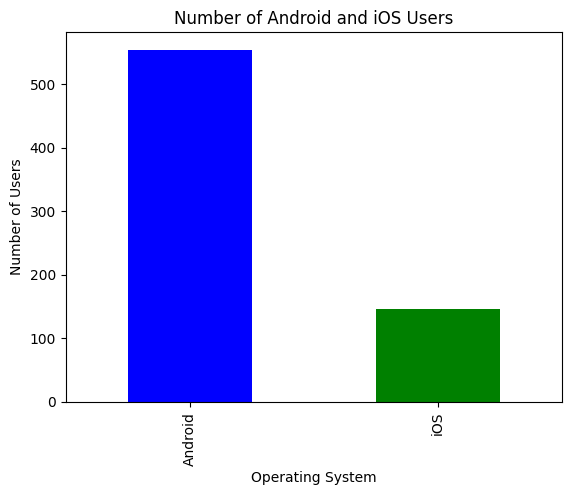

In [11]:
# bar chart of device models
os_counts = data.iloc[:, 2].value_counts()

# Create the bar chart
os_counts.plot(kind='bar', color=['blue', 'green'])

# Set the title and labels
plt.title('Number of Android and iOS Users')
plt.xlabel('Operating System')
plt.ylabel('Number of Users')

# Show the plot
plt.show()



<h1>Dataset 2: E-Commerce Shipping Data</h1>
Author: Prachi Golpani
<br>
Purpose: The purpose of this dataset is to provide insights based on the shopping data of an international e-commerce business' customers.
<br>
Shape: This Data set is composed of 12 Columns, and 10999 rows.
<br><br>
Link:
<a href="https://www.kaggle.com/datasets/prachi13/customer-analytics"> E-Commerce Shipping Data</a>
<br><br>
<h3>Dataset Feature List: </h3>
<ol>
    <li>Customer ID:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The Customer ID is a unique ID that is assigned to each customer, allowing the E-commerce business to track the customer's purchases. There are 10999 entries, ranging from 1-10999.
    </li>
    <br>
    <li>Warehouse Block:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: A Warehouse block is a division of the shipping e-commerce business' warehouse. There are 5 blocks labelled A,B,C,D,F. The specific block designates where a product was stored in the e-commerce warehouse. 
        </li>
    <br>
    <li>Mode of Shipment:
    <br>
    Feature Type: Categorical - Nominal
    <br>
    Description: The mode of shipment describes the shipping method used to deliver the product to the customer. There are 3 modes of shipment: road, flight, and ship. 
        </li>
    <br>
    <li>Customer Care Calls:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Customer Care Calls provides the number of times a customer called the e-commerce business to inquire about the product, and anything related to the process of purchase and delivery.
        </li>
    <br>
    <li>Customer Rating:
    <br>
    Feature Type: Categorical - Ordinal
    <br>
    Description: The customer rating represents the rating given by the customer to the e-commerce business regarding the product(s) purchased, the delivery experience, and the ordering process for that specific order. The rating ranges from 1-5, 1 indicating the most negative experience, and 5 being the most positive experience.
        </li>
    <br>
    <li>Cost of Product:
    <br>
    Feature Type: Numerical - Continuous
    <br>
    Description: The cost of the product is the value of the product in USD. 
        </li>
    <br>
    <li>Prior Purchases:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Prior Purchases represents the number of times a customer has previously purchased a product from the e-commerce business.
        </li>
    <br>
    <li>Product Importance:
    <br>
    Feature Type: Categorical - Ordinal
    <br>
    Description: Product Importance is the level of importance the e-commerce business has placed on a specific product. The importance scale has values: low, medium, and high. Low denoting the lowest importance, medium denoting the mid level importance, and high denoting the most important.
        </li>
    <br>
    <li>Gender:
    <br>
    Feature Type: Categorical - Nominal (Male/Female)
    <br>
    Description: The Gender of the customer.
        </li>
    <br>
    <li>Discount Offered:
    <br>
    Feature Type: Numerical - Discrete
    <br>
    Description: Discount offered is the percentage reduction in price of the product purchased.
        </li>
    <br>
    <li>Weight In Grams:
    <br>
    Feature Type: Numerical - Continuous
    <br>
    Description: The weight of the product measured in grams.
        </li>
    <br>
    <li>Reached on Time:
    <br>
    Feature Type: Categorical - Nominal (0/1)
    <br>
    Description: A binary value indicating if the product reached its intended destination on time. 0 means the product did not reach on time, and 1 means that the product did.
        </li>
</ol>

In [12]:
# Retrieve Latest version of the e-commerce dataset from kaggle
ecommerce_dataset_path = kagglehub.dataset_download("prachi13/customer-analytics")
print("Path to dataset: ", ecommerce_dataset_path)

Path to dataset:  /home/pixellitz/.cache/kagglehub/datasets/prachi13/customer-analytics/versions/1
